<a href="https://colab.research.google.com/github/rashmi0852/Netflix_Content_Clustering_and_Recommended_System/blob/main/Netflix_Content_and_Recommended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Netflix_Content_Clustering_and_Recommended_System





##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [337]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Dataset Loading

In [338]:
# Load Dataset
netflix=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [339]:
# Dataset First Look
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [340]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [341]:
# Dataset Rows & Columns count

num_rows, num_cols = netflix.shape

print("Total rows in dataset=",num_rows)

print("Total columns in dataset=",num_cols)


Total rows in dataset= 7787
Total columns in dataset= 12


### Dataset Information

In [342]:
# Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [343]:
# Dataset Duplicate Value Count
netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [344]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
netflix.isnull().sum()

Missing Values in each column
------------------------------


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

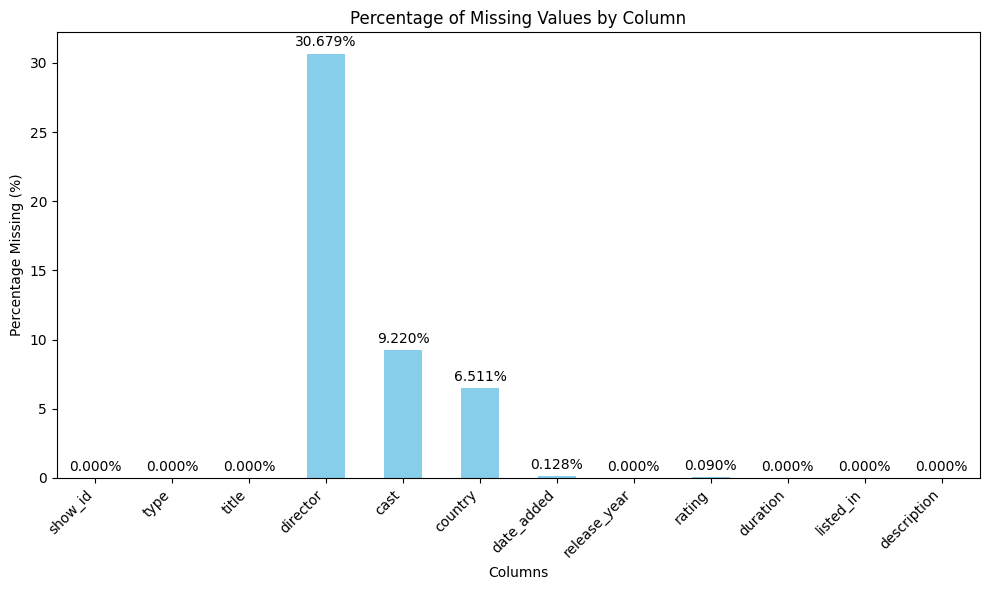

In [345]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45,ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()



### What did you know about your dataset?

By exploring Netflix content datset following insights were found
* The dataset contains 12 features and 7,787 records.
* Five features contain missing values, with "director" having the highest number of null values, accounting for approximately 30% of its data, while the other four features have less than 10% missing data.
* Out of the 12 features, 11 are of categorical type, while the feature "release_year" is of numerical type.
* The "date_added" column values are in a time/date format, and the "duration" column values are in numeric format, so both need to be converted to their respective data types from the object type.

## ***2. Understanding Your Variables***

In [346]:
# Dataset Columns
# Dataset Columns
print(f"Available columns:\n{netflix.columns}")

Available columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [347]:
# Dataset Describe
netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

* show_id: Unique identifier for each movie/show.

* type: Indicates whether the entry is a movie or a TV show.

* title: Name of the movie or TV show.

* director: Name of the director(s) of the movie or TV show.

* cast: Names of the actors and actresses featured in the movie or TV show.

* country: Country or countries where the movie or TV show was produced.

* date_added: Date when the movie or TV show was added to Netflix.

* release_year: Year when the movie or TV show was released.

* rating: TV rating or movie rating of the movie or TV show.

* duration: Length of the movie or TV show in minutes or seasons.

* listed_in: Categories or genres of the movie or TV show.

* description: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [348]:
# Check Unique Values for each variable.
for column in netflix.columns:
    # Get value counts for the current column
    value_counts = netflix[column].value_counts()

    # Get the number of unique values for the current column
    nunique = netflix[column].nunique()

    # Print the results for the current column
    print("--" * 50)
    print("Column Name:", column)
    print("\nNumber of Unique Values:", nunique)
    print("\nValue Counts:")
    print(value_counts,"\n")
    print("--" * 50)
    print("\n")


----------------------------------------------------------------------------------------------------
Column Name: show_id

Number of Unique Values: 7787

Value Counts:
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: type

Number of Unique Values: 2

Value Counts:
Movie      5377
TV Show    2410
Name: type, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: title

Number of Unique Values: 7787

Value Counts:
3%                                          1
Results                     

* Focus is on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, plan is to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
Additionally, I will  develop a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handeling Null Values

In [349]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent )

show_id          0.000
type             0.000
title            0.000
director        30.679
cast             9.220
country          6.511
date_added       0.128
release_year     0.000
rating           0.090
duration         0.000
listed_in        0.000
description      0.000
dtype: float64


In [350]:
# Drop records of those columns whose missing values less than 5%.
netflix.dropna(subset=["rating","date_added"],inplace=True)

In [351]:
#calculate mode & fill missing of country column

# Create a SimpleImputer with the "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Transform and fill the missing values in the "country" column
netflix['country'] = imputer.fit_transform(netflix[['country']])

In [352]:
# Replace missing values in the "cast" column with "unknown"
netflix['cast'].fillna('unknown', inplace=True)

# Replace missing values in the "director" column with "unknown"
netflix['director'].fillna('unknown', inplace=True)

In [353]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


#### Duration to numeric

In [354]:
# Extract the numeric part of the "duration" column and convert it to integer
netflix['duration'] = netflix['duration'].str.extract('(\d+)').astype(int)


In [355]:
netflix["duration"].head()

0      4
1     93
2     78
3     80
4    123
Name: duration, dtype: int64

#### date_added to date type

In [356]:
# Convert the "date_added" column to datetime type
netflix['date_added'] = pd.to_datetime(netflix['date_added'])


In [357]:
# Extract date, month, and year
netflix['added_day'] = netflix['date_added'].dt.day
netflix['added_month'] = netflix['date_added'].dt.month
netflix['added_year'] = netflix['date_added'].dt.year



In [358]:
netflix[["date_added","added_day","added_month","added_year"]].head()

,date_added,added_day,added_month,added_year
0,2020-08-14,14,8,2020
1,2016-12-23,23,12,2016
2,2018-12-20,20,12,2018
3,2017-11-16,16,11,2017
4,2020-01-01,1,1,2020


In [359]:
# Dropping date_added
netflix.drop('date_added', axis=1, inplace=True)

#### Ratings handeling

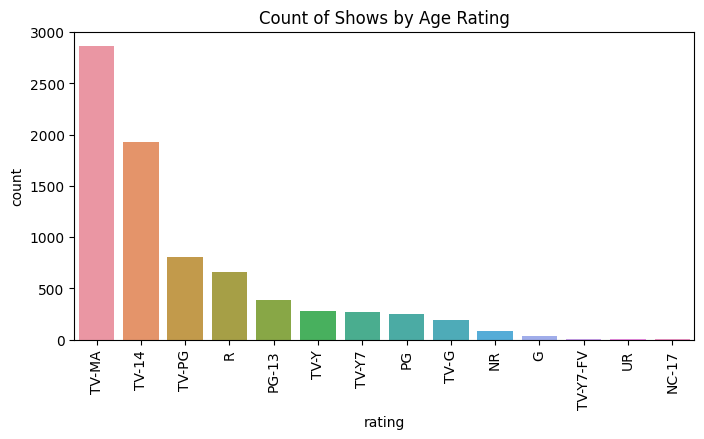

In [360]:
# Create a countplot to visualize the age ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=netflix, order=netflix['rating'].value_counts().index)
plt.title('Count of Shows by Age Rating')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [361]:
#Unique values of rating
print(netflix["rating"].unique())
netflix["rating"].nunique()

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


14

In [362]:
#Create corresponding alternate map for all categories
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'NR':'Adults',
              'NC-17':'Adults',
              'UR':'Adults',
              'TV-14':'Young Adults',
              'PG-13':'Teens',
              'TV-PG':'Older Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'TV-Y7-FV':'Older Kids',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'G':'Kids',
            }

In [363]:
#Replace by map values
netflix['rating'].replace(rating_map, inplace = True)

In [364]:
print(netflix['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


#### Extract primary value for country & listed_in

In [365]:
#check values of coutry column
netflix["country"].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [366]:
#check values of listed_in column
netflix["listed_in"].value_counts()


Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [367]:
# Function to extract the primary value
def extract_primary(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value

# Apply the function to 'country' and 'listed_in' columns
netflix['country'] = netflix['country'].apply(extract_primary)
netflix['listed_in'] = netflix['listed_in'].apply(extract_primary)


netflix.sample(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_day,added_month,added_year
679,s680,Movie,Back to the 90s,Yanyong Kuruaungkoul,"Dan Aaron Ramnarong, Pimchanok Leuwisetpaiboon...",Thailand,2015,Young Adults,111,Comedies,When a teenager is transported back to his par...,1,1,2019
668,s669,TV Show,Baby,unknown,"Benedetta Porcaroli, Alice Pagani, Riccardo Ma...",Italy,2020,Adults,3,International TV Shows,"Fed up with their families and classmates, two...",16,9,2020
3293,s3294,Movie,Kalek Shanab,Hani Al-Shaibani,"Saad Abdullah, Mohamed Alkendi, Ammar Rahma, M...",United Arab Emirates,2019,Older Kids,80,Comedies,"After a wild night of partying on the town, th...",1,6,2020
926,s927,Movie,Billu,Priyadarshan,"Irrfan Khan, Shah Rukh Khan, Lara Dutta, Rajpa...",India,2009,Older Kids,132,Dramas,An Indian village is abuzz with news that a ma...,1,4,2018
4809,s4810,Movie,Pee Mak,Banjong Pisanthanakun,"Mario Maurer, Davika Hoorne, Nattapong Chartpo...",Thailand,2013,Adults,112,Comedies,"Mak's friends just want to protect him, but hi...",1,9,2018


### What all manipulations have you done and insights you found?

* ***missing values handeling:***
 - Netfix dataset have null values in 5 columns .`rating`,`date_added` contains missing values less than 5 % so i droped them with dropna().
 - `country`,`cast` & `director` has missing values 6%,9% & 30% respectively ,country column missing values replaced by most frequent values with simple imputer() & cast & director replaced by unknown value.
* ***Duration , Date_added & Ratings Handeling:***
 - `duration` column contains values for content duration & it was originally in object form , convered to integer form by removing min/season word from it.
 - `date_added` has date within so it converted to date form & then day,month year exrated from it.
 - `ratings` contains multiple types of ratings from different userd ,it converted to adult,kinds,teens etc form.
* ***Extract primary value for country & listed_in:***
 - `country`,`listed_in` has multiple values within it ,primary value is extrated from both the columns.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate Analysis

#### Chart - 1

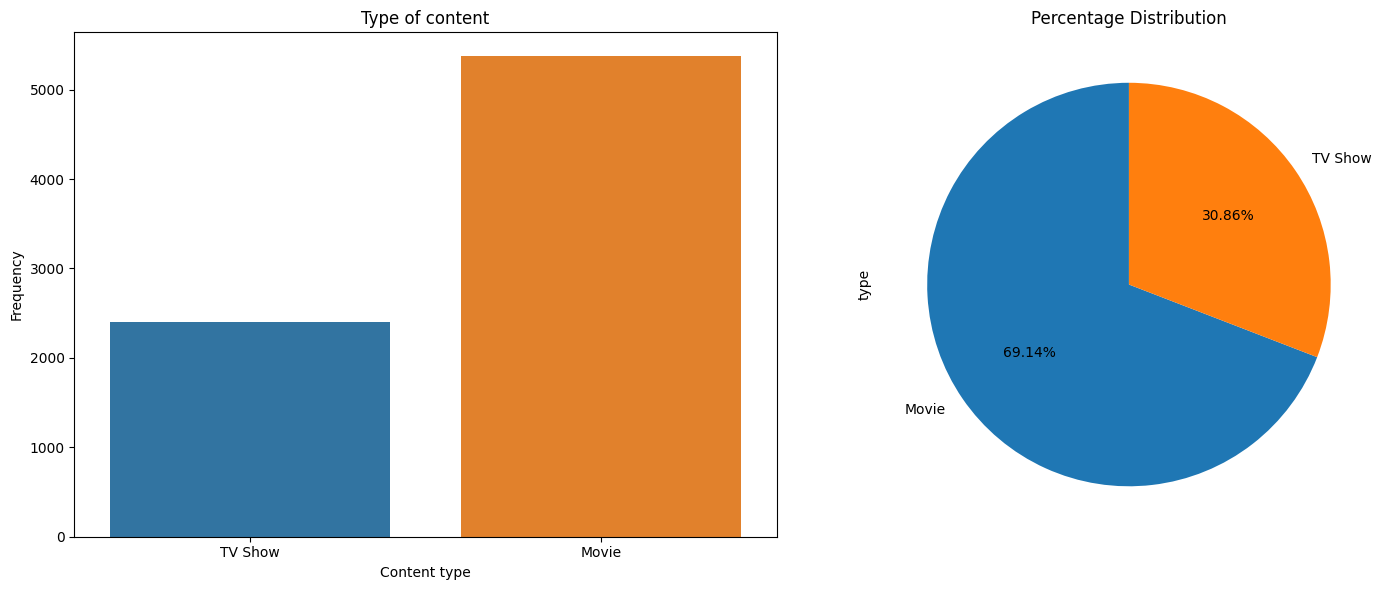

In [368]:
# Problem -1: What are the different type of content available?
# Chart - 1 visualization code

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Countplot
sns.countplot(data=netflix, x="type", ax=ax[0])
ax[0].set_title("Type of content")
ax[0].set_xlabel("Content type")
ax[0].set_ylabel("Frequency")

# Pie Chart
netflix['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], startangle=90)
ax[1].set_title('Percentage Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots side by side
plt.show()


##### 1. Why did you pick the specific chart?

we've chosen a countplot to show the exact counts of "Movies" and "TV Shows." This gives a clear comparison of how many of each type of content is in our dataset. Additionally, we've chosen a pie chart to show the percentage distribution of these content types, which allows us to see the proportion of movies and TV shows in the whole dataset.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the content available on Netflix is in the form of "Movies."
* "TV Shows" constitute a smaller portion of the overall content on the platform.
* The pie chart provides a clear visual representation of the distribution, with "Movies" taking up a larger portion of the whole.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

  - Content Strategy: The insight that a larger portion of the content consists of "Movies" suggests that movies are more prevalent on the platform. This could inform content acquisition and production strategies, allowing Netflix to focus on obtaining popular and diverse movie titles to cater to a wider audience.

  - User Engagement: Understanding that "Movies" dominate the content catalog can help Netflix tailor its marketing and user engagement strategies. This insight could lead to targeted promotional campaigns for specific genres, leveraging the popularity of movies to attract and retain subscribers.

  - Retention Strategies: By knowing that movies are more abundant, Netflix can create customized recommendations and curated collections to enhance user engagement and satisfaction. Providing users with relevant movie suggestions could lead to increased usage and longer subscription durations.

* Negative Growth Insights:

  - The provided visualizations do not directly indicate any insights that would lead to negative growth. However, it's important to note that the lack of "TV Shows" might imply a potential gap in certain content areas:

  - Diversity of Content: If the available "TV Shows" are limited in number or variety, there could be negative implications for subscribers who prefer TV series. They might find the content offerings lacking, potentially leading to lower satisfaction or churn.

  - Market Competitiveness: If competitors are offering a broader range of TV shows, Netflix might face challenges in attracting users who are specifically seeking TV series content. This could impact their market share.



#### Chart - 2

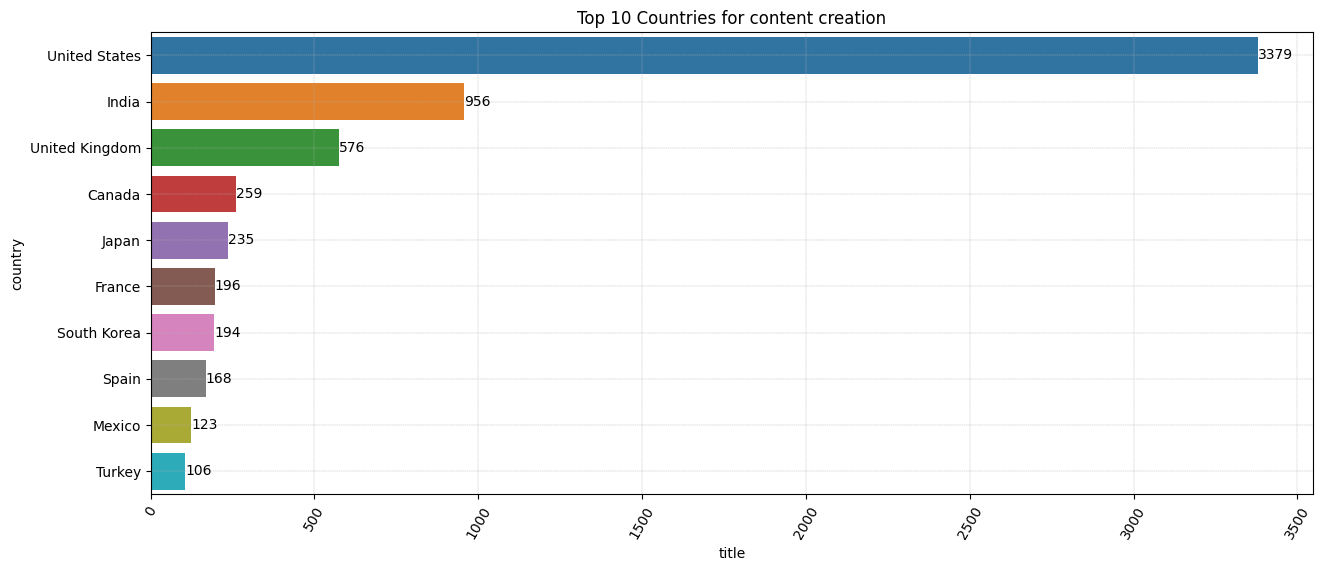

In [369]:
# problem-2: which are top 10 countries in content creation?
# Chart - 2 visualization code

df_country = netflix.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a bar chart in the provided visualization code is apt for conveying the "Top 10 Countries for Content Creation." It effectively presents categorical data, showcasing the number of unique titles produced by each country, enabling a straightforward comparison of content production levels. The ordered display, with countries sorted in descending order, makes it readily apparent which nations are the foremost contributors to content creation. Additionally, the inclusion of labels on the bars, rotated x-axis labels for improved readability, a descriptive title, and gridlines for reference enhance the chart's clarity and communicative power, making it a suitable choice for visualizing and identifying the leading content-producing countries in a concise and accessible manner.

##### 2. What is/are the insight(s) found from the chart?

- **Content Production Leaders:** The United States takes the lead, highlighting its significant contribution to Netflix's content library, attributed to a robust entertainment industry presence.

- **Global Diversity:** Countries like India, the United Kingdom, Canada, and Japan also offer a substantial number of shows, showcasing content diversity from around the world, catering to diverse viewer preferences and cultures.

- **Language and Localization:** The presence of shows from various countries underscores Netflix's efforts to offer content in multiple languages and localize it for global audiences, appealing to a broader subscriber base.

- **Regional Appeal:** Notable contributors like South Korea, Spain, and Mexico indicate the popularity of content from these regions, reflecting a growing interest in international content and cross-cultural exploration.

- **Potential Audience Segmentation:** The distribution of shows across countries can aid Netflix in segmenting its audience based on regional tastes, enabling the delivery of tailored content.

- **Collaborative Productions:** Co-productions between countries play a role in high show numbers, fostering diversity and engagement through resource-sharing and talent collaboration.

- **Market Penetration:** The number of shows from a specific country can reflect the extent of Netflix's presence and focus in specific regions, offering valuable insights into market penetration strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of countries with the highest number of shows on Netflix can indeed have a positive business impact. However, it's important to consider potential challenges and negative aspects as well. Let's examine both:

**Positive Business Impact**:

1. **Audience Engagement and Retention**: By understanding the diversity of content production across countries, Netflix can better engage and retain a global audience. Offering a wide range of content in different languages and from various cultures caters to the preferences of a broader subscriber base, potentially increasing user satisfaction and loyalty.

2. **Market Expansion**: The data provides valuable insights into market penetration. Netflix can strategically focus on regions with a strong presence of shows, further expanding its market reach. This can lead to increased subscriptions and revenue growth.

3. **Customized Content**: The ability to segment the audience based on regional preferences allows Netflix to deliver curated content, enhancing the user experience. This customization can result in higher viewer satisfaction and increased viewing time.

4. **Collaborative Opportunities**: The insights into collaborative productions highlight the potential for international partnerships. Collaborations can lead to unique and engaging content, attracting a wider global audience and fostering creative innovation.

**Negative Growth Considerations**:

1. **Content Licensing Costs**: Producing and licensing content from various countries can be expensive. If the cost of acquiring and producing content from some regions outweighs the revenue generated, it could lead to financial challenges.

2. **Cultural Sensitivity**: While diversity is a strength, it also requires careful consideration of cultural nuances and sensitivities. A misstep in content localization or cultural understanding can lead to negative publicity and subscriber loss.

3. **Regional Competition**: In regions with a high number of shows, Netflix may face intense competition from local streaming platforms. Maintaining a competitive edge in these markets can be challenging.

4. **Audience Fragmentation**: Customized content for specific regions may lead to audience fragmentation, making it harder to promote universally popular content. This can affect the platform's ability to create global hits.

.

#### Chart - 3

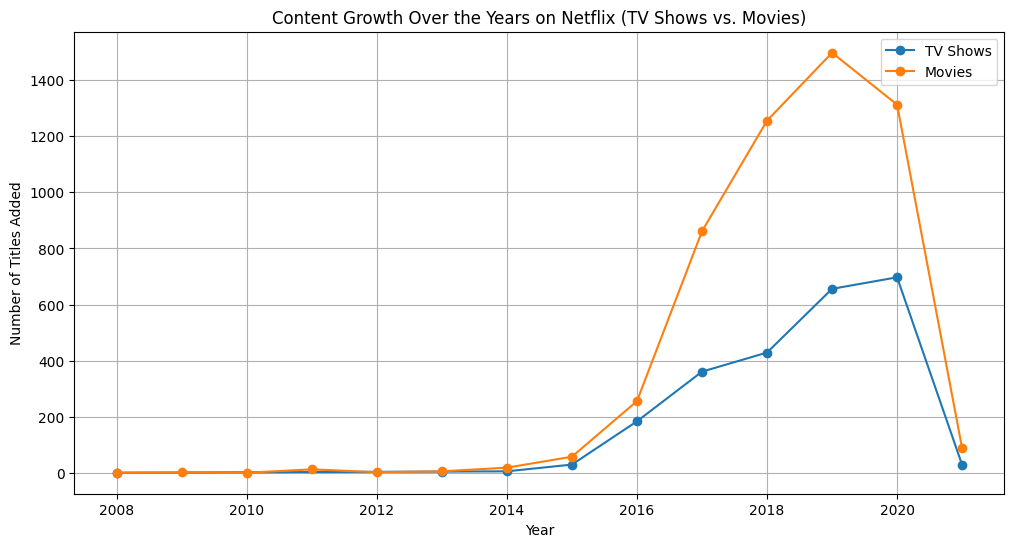

In [370]:
# problem-3: what is the content growth over the year?
# Chart - 3 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'netflix'
# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_year' and count the number of titles added for each year
tv_shows_growth = tv_shows.groupby('added_year')['show_id'].count()
movies_growth = movies.groupby('added_year')['show_id'].count()

# Create two line plots
plt.figure(figsize=(12, 6))

plt.plot(tv_shows_growth.index, tv_shows_growth.values, marker='o', label='TV Shows')
plt.plot(movies_growth.index, movies_growth.values, marker='o', label='Movies')

plt.title('Content Growth Over the Years on Netflix (TV Shows vs. Movies)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

The choice of line charts in the provided visualization was deliberate due to their suitability for tracking content growth over time, particularly in the context of analyzing 'TV Shows' and 'Movies'. Line charts excel at representing temporal data, making them ideal for capturing trends and changes in content addition. The comparative aspect is well-suited for line charts as they allow a clear side-by-side assessment of the growth of both categories. Line charts are both readable and precise, allowing for easy interpretation of the number of titles added for each year. The use of markers further aids in pinpointing specific data points, and the inclusion of a legend ensures that 'TV Shows' and 'Movies' are clearly distinguished. Overall, line charts are a robust choice for visualizing the dynamics of content growth over a defined time span and comparing different content categories.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the line charts depicting content growth for 'TV Shows' and 'Movies' on Netflix are as follows:

1. **Steady Growth for Both Categories**: Both 'TV Shows' and 'Movies' have experienced consistent growth over the decade. This suggests a sustained effort by Netflix to expand its content library in both categories.

2. **Movies Lead in Early Years**: In the early part of the decade (around 2010-2015), 'Movies' had a more significant number of additions compared to 'TV Shows.' This might indicate an initial focus on building up the movie catalog.

3. **TV Shows Catch Up**: As the years progressed, 'TV Shows' showed significant growth, and by the mid-2010s, they began to catch up with the number of movies added. This could reflect changing viewer preferences and the popularity of original TV series on the platform.

4. **Crossover Point**: There appears to be a crossover point around 2017-2018 when the growth of 'TV Shows' surpassed that of 'Movies.' This crossover suggests a shift in content strategy towards producing and adding more TV series.

5. **Diverse Content Strategy**: Netflix's content strategy seems to balance both categories, with 'Movies' and 'TV Shows' contributing to the overall content growth. This diversity caters to a wide range of viewer preferences.

6. **Potential Viewer Trends**: The data indicates changing viewer trends and interests over the years. An uptick in TV show additions may be in response to the rising popularity of binge-watching TV series.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the content growth for 'TV Shows' and 'Movies' can indeed help create a positive business impact. However, there are certain insights that, if not carefully managed, could potentially have negative repercussions. Let's assess both the positive and negative aspects:

**Positive Business Impact**:

1. **Data-Informed Decision-Making**: The insights provide valuable information for data-informed decision-making. Netflix can tailor its content acquisition and production strategies to align with viewer preferences, ensuring that content additions resonate with the audience.

2. **Balanced Content Strategy**: The balance between 'TV Shows' and 'Movies' growth indicates flexibility and adaptability. Netflix can continue to diversify its content library, appealing to a broad spectrum of viewer tastes, leading to increased subscriber satisfaction and loyalty.

3. **Market Expansion**: The steady content growth demonstrates a consistent commitment to expanding the platform's content offering. This can attract new subscribers, reduce churn, and contribute to revenue growth.

4. **Content Trends**: Insights into viewer trends and preferences can be leveraged to create and acquire content that aligns with the zeitgeist. This enables Netflix to stay relevant and competitive.

**Negative Growth Considerations**:

1. **Oversaturation**: An overabundance of content can overwhelm viewers and potentially dilute the quality of offerings. Careful content curation is essential to maintain a high-quality viewing experience.

2. **Balancing Costs**: Expanding content libraries can lead to increased licensing and production costs. Ensuring that the investment in content aligns with subscriber growth is vital to avoiding negative financial impacts.

3. **Viewer Fragmentation**: While diversity is a strength, excessive content additions may lead to viewer fragmentation. Striking a balance between satisfying niche interests and offering universally popular content is crucial to prevent alienating certain segments of the audience.

4. **Viewer Fatigue**: Continuous content growth may lead to viewer fatigue if not managed effectively. To create a positive impact, Netflix should focus on providing content that remains engaging and exciting for its subscribers.



#### Chart - 4

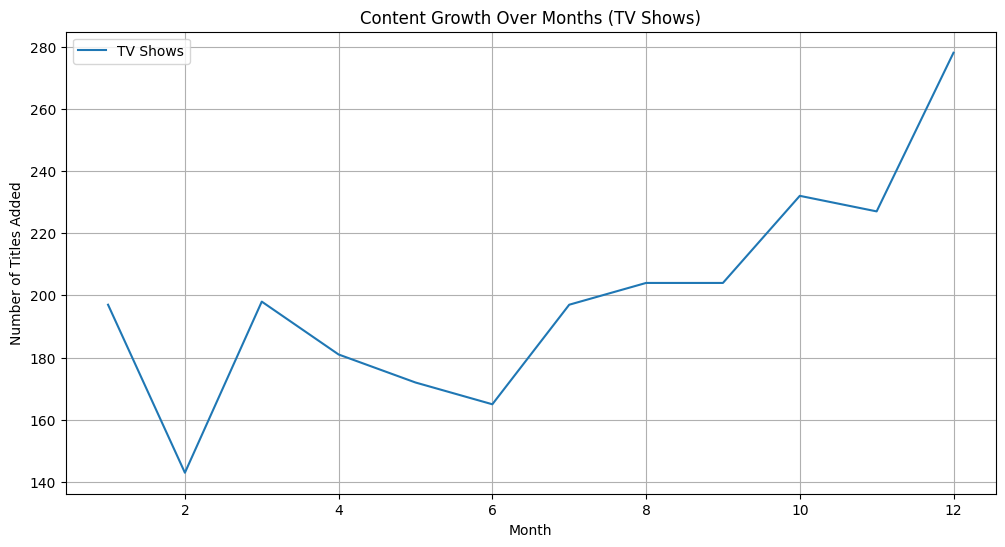

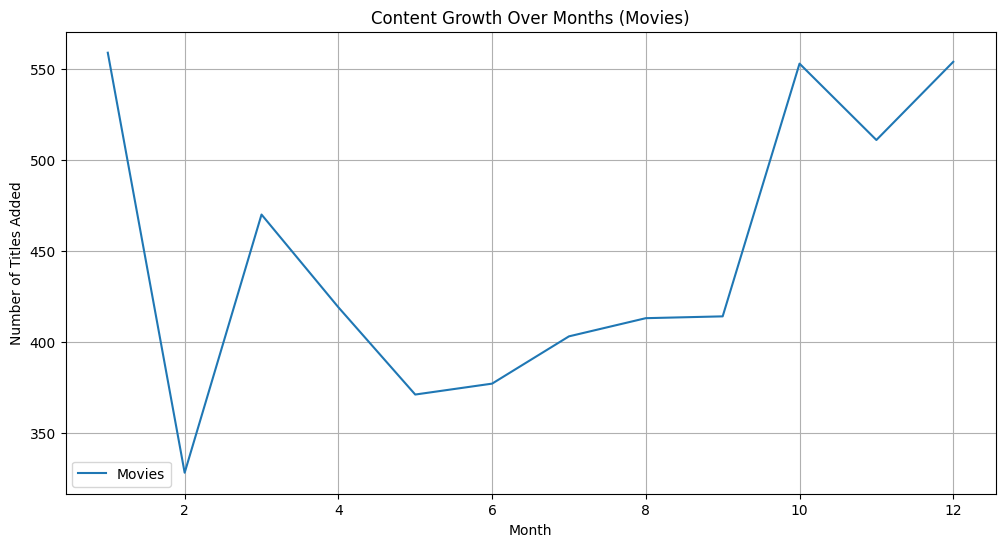

In [371]:
# problem-4: In which month do most movies and tv shows get added on netflix?
# Chart - 4 visualization code

# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_month' and count the number of titles added for each month
tv_shows_growth = tv_shows.groupby('added_month')['show_id'].count()
movies_growth = movies.groupby('added_month')['show_id'].count()

# Create a line plot for 'TV Shows'
plt.figure(figsize=(12, 6))
sns.lineplot(x=tv_shows_growth.index, y=tv_shows_growth.values, label='TV Shows')
plt.title('Content Growth Over Months (TV Shows)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()

# Create a line plot for 'Movies'
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_growth.index, y=movies_growth.values, label='Movies')
plt.title('Content Growth Over Months (Movies)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

The choice of line plots in the provided visualization code is well-suited for the task of analyzing content growth for "TV Shows" and "Movies" on Netflix over the months. Line plots are the ideal choice for visualizing temporal data, as they effectively represent how the number of titles added evolves over time, making it easy to spot trends and fluctuations. Additionally, line plots excel in comparing multiple data series, allowing for a side-by-side assessment of content growth for the two different categories. Their readability and precision make it simple to interpret the number of titles added each month. The use of legends in these line plots further aids in distinguishing between "TV Shows" and "Movies." Overall, line plots are a logical and informative choice for visualizing and comparing content growth trends over time.

##### 2. What is/are the insight(s) found from the chart?

The line plots displaying content growth for "TV Shows" and "Movies" on Netflix over the months reveal several key insights:

1. **Seasonal Patterns**: Both "TV Shows" and "Movies" exhibit seasonal patterns in content additions. There are visible peaks in certain months, indicating periods of increased content releases. Understanding these patterns can help Netflix strategically time the release of new content to align with viewer demand.

2. **TV Show Dominance**: TV shows consistently outpace movies in terms of content growth throughout the year. This suggests that TV series are a focal point of Netflix's content strategy, catering to viewers' preferences for ongoing and serialized storytelling.

3. **Movie Growth**: While movies have a lower growth rate compared to TV shows, they still experience notable fluctuations. The months of high movie additions may coincide with holidays, special events, or film releases, which can influence the content strategy.

4. **January and December Peaks**: Both "TV Shows" and "Movies" see peaks in January and December. This aligns with the holiday season, where viewers often have more leisure time for binge-watching content, making it a strategic time for content additions.

5. **Mid-Year Surge**: For "TV Shows," there is a noticeable surge in content additions in the middle of the year, particularly around May and June. This could be linked to content strategies around summer vacations and viewership habits.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing content growth for "TV Shows" and "Movies" on Netflix can indeed help create a positive business impact. However, there are certain insights that, if not managed properly, could potentially have negative implications. Here's a breakdown of the positive and potential negative impacts:

**Positive Business Impact**:

1. **Seasonal Content Strategy**: Understanding the seasonal patterns in content additions allows Netflix to strategically time the release of new content. This can lead to increased viewer engagement, longer subscription retention, and potentially higher subscriber numbers during peak months like January and December.

2. **Content Prioritization**: Recognizing the dominance of "TV Shows" in content growth suggests that investing in TV series production is a sound strategy to cater to viewer preferences. This can lead to an expanded subscriber base and increased watch time.

3. **Data-Informed Decision-Making**: The insights provide valuable data for data-informed decision-making in content acquisition and production, ensuring that content additions resonate with viewer habits and demands.

4. **Competitive Edge**: By aligning content additions with viewer preferences, Netflix can maintain a competitive edge in the streaming market, attracting and retaining subscribers in a competitive landscape.

**Negative Growth Considerations**:

1. **Overemphasis on Peak Months**: Overemphasizing content additions in peak months, such as January and December, could lead to oversaturation and potentially compromise the quality of offerings. Balancing content quality with quantity is crucial to avoid negative viewer experiences.

2. **Content Fragmentation**: Focusing too heavily on specific months or seasons could lead to viewer fatigue and a fragmented audience. Maintaining a consistent stream of engaging content throughout the year is essential to avoid potential negative impacts.

3. **Resource Allocation**: The insights might lead to resource allocation challenges. If there is an excessive focus on a few peak months, it could strain production and licensing resources, potentially leading to increased costs without proportionate returns.

4. **Viewer Expectations**: Aligning content additions with viewer expectations during peak months places a high demand on delivering quality content consistently. If Netflix fails to meet these expectations, it could result in subscriber dissatisfaction and churn.



#### Chart - 5

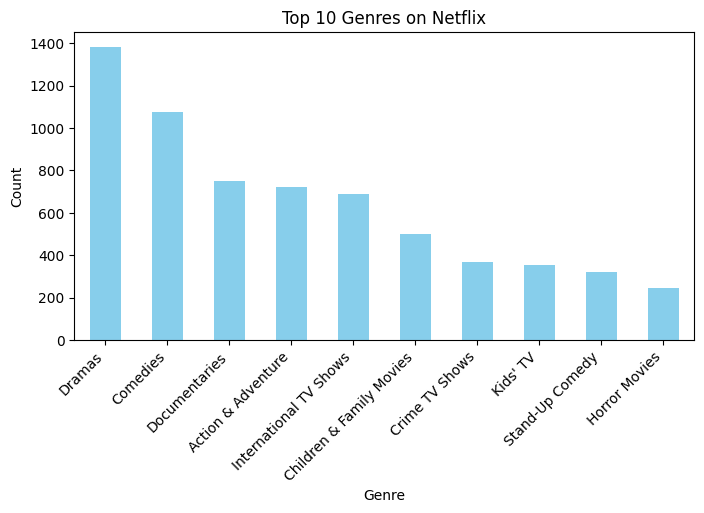

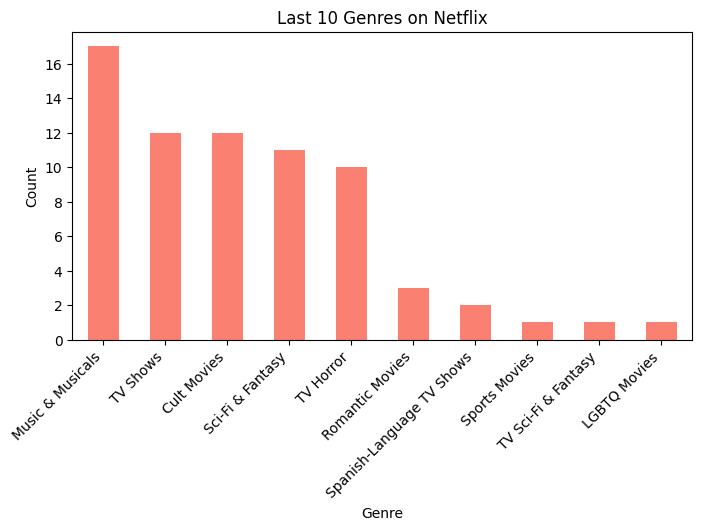

In [372]:
#problem-5 : find top 10 and last 10 genre present in listed_in?
# Chart - 5 visualization code

# Split the 'listed_in' column to create a list of genres
netflix['listed_in'] = netflix['listed_in'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in netflix['listed_in'].tolist() for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Find the top 10 genres
top_10_genres = genre_counts.head(10)

# Find the last 10 genres
last_10_genres = genre_counts.tail(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(8, 4))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

# Create a bar plot for the last 10 genres
plt.figure(figsize=(8, 4))
last_10_genres.plot(kind='bar', color='salmon')
plt.title('Last 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

The choice of bar charts for visualizing the distribution of genres in the 'listed_in' column of the Netflix dataset is apt due to the categorical nature of the data. Bar charts are well-suited for representing and comparing the count of different genres, as each genre is a distinct category. They provide a straightforward and visually clear means of conveying the frequency of each genre, enabling viewers to quickly identify the most and least prevalent genres. The ability to label the categories on the x-axis and the side-by-side presentation of the top 10 and last 10 genres in separate plots make bar charts a practical choice, allowing for an effective visual assessment of genre distribution in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Top 10 Genres:

* Diverse Genre Offerings: The top genres include a variety of content, ranging from dramas, comedies, documentaries, and action & adventure. This diversity reflects Netflix's efforts to cater to a wide range of viewer preferences.

* Mainstream Appeal: Genres like dramas, comedies, and documentaries have a high count, indicating their popularity and mainstream appeal among viewers.

* Global Audience: The presence of "International TV Shows" in the top genres suggests that Netflix has a strong focus on providing content from various countries, appealing to a global audience.

* Family and Kids' Content: The presence of "Children & Family Movies," "Kids' TV," and "Animation" genres indicates a commitment to offering family-friendly content.

* Entertainment Variety: Genres like "Stand-Up Comedy" and "Music & Musicals" add entertainment variety, addressing different moods and preferences.

Last 10 Genres:

* Niche and Specialized Content: The genres in the last 10 list, such as "Cult Movies," "TV Horror," and "Sci-Fi & Fantasy," tend to be more specialized and might cater to niche audiences.

* Limited Appeal: Genres with lower counts, such as "LGBTQ Movies," "Sports Movies," and "Spanish-Language TV Shows," suggest that these genres might have limited appeal compared to more mainstream genres.

* Highly Specific Content: The genres "TV Sci-Fi & Fantasy" and "TV Horror" are specific subgenres that might cater to fans of these particular genres.

* Limited Availability: Some genres with very low counts (e.g., "Sports Movies") might indicate that Netflix offers limited content within those genres.

* Viewer Diversity: The presence of genres like "TV Shows" and "Romantic Movies" suggests that Netflix aims to cater to diverse viewer interests, even if these genres have lower counts.

* Content Focus: Lower counts in some genres might reflect a strategic decision to focus resources on more popular and mainstream genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the distribution of genres in the 'listed_in' column of the Netflix dataset can indeed contribute to creating a positive business impact. However, some insights should be managed carefully to avoid potential negative consequences. Let's explore both the positive and negative aspects:

**Positive Business Impact**:

1. **Content Strategy Optimization**: Understanding the most popular genres can help Netflix optimize its content acquisition and production strategies. By focusing on the top genres, Netflix can cater to a broader viewer base and increase viewer engagement.

2. **Targeted Marketing**: Netflix can use genre insights to tailor its marketing campaigns. Highlighting content from popular genres can attract more subscribers and encourage current subscribers to explore a wider range of content.

3. **Viewer Engagement**: By aligning its content library with viewer preferences, Netflix can enhance viewer satisfaction and retention. Satisfied and engaged subscribers are more likely to continue their subscriptions.

4. **Content Recommendations**: These genre insights can improve Netflix's content recommendation algorithms. When subscribers see content recommendations that align with their favorite genres, they are more likely to find content they enjoy.

**Negative Growth Considerations**:

1. **Overemphasizing Popular Genres**: While focusing on popular genres is beneficial, overemphasizing them may lead to content oversaturation, potentially compromising the quality and diversity of the library. Striking a balance between popular and niche genres is crucial to avoid monotony.

2. **Neglecting Niche Interests**: Overprioritizing popular genres might neglect niche interests, potentially leading to dissatisfaction among subscribers with unique tastes. Balancing content acquisition to cater to a diverse range of preferences is essential.

3. **Rigidity in Content Strategy**: Relying solely on popular genres can make Netflix's content strategy rigid. To foster innovation and attract a wider audience, there's a need to invest in new and experimental genres, even if they are less popular.

4. **Market Competition**: Popular genres can also be the target of competition from other streaming platforms. Netflix must continuously evolve its content strategy to stay ahead in a competitive market.


#### Chart - 6

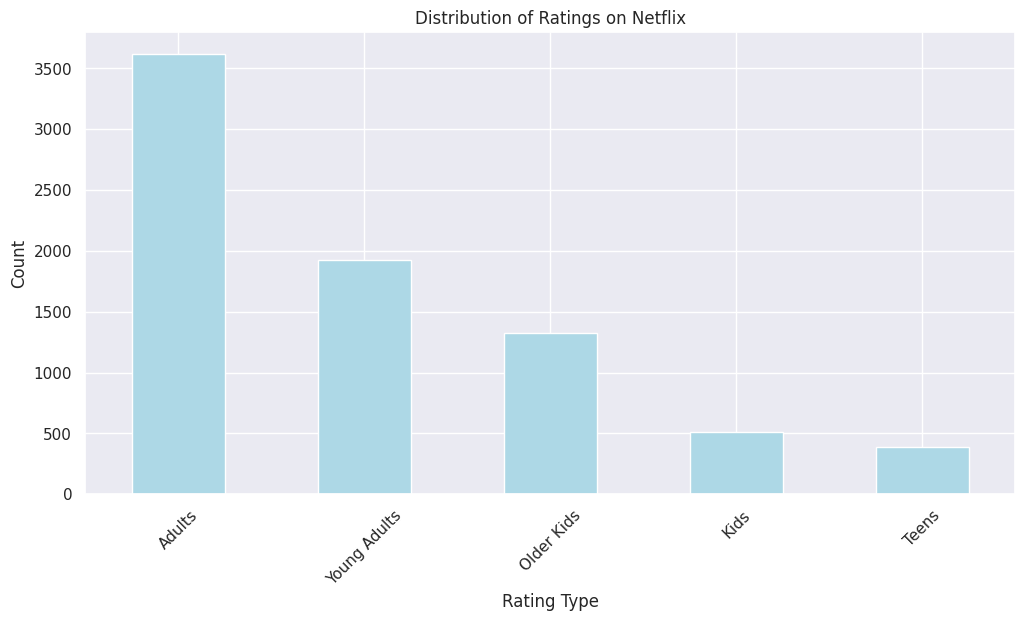

In [421]:
#problem-6: describe type of raings?
# Chart - 6 visualization code

# Count the occurrences of each rating type
rating_counts = netflix['rating'].value_counts().sort_values(ascending=False)

# Create a bar plot for ratings in descending order
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to visualize the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" in the Netflix dataset due to its suitability for representing categorical data and effectively conveying the frequency or count of each rating category. The descending order of the bars in the chart highlights the most common rating categories at the top, facilitating quick identification of prevalent categories. Category labels on the x-axis ensure clarity in associating rating categories with their respective bars. The bar chart provides a visually clear and straightforward representation of the distribution, allowing viewers to readily interpret the data and make informed assessments of the prevalence of each category. Additionally, the side-by-side presentation of categories enables viewers to visually compare the different rating categories, aiding in the identification of trends and differences within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar chart representing the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" provides several insights based on the descending order of prevalence within these categories:

1. **Strong Emphasis on Adult Content**: The chart highlights that the majority of content on Netflix is rated for "Adults." This insight suggests that Netflix caters to an adult audience as its primary demographic, potentially due to the platform's focus on a diverse range of content, including mature themes and genres.

2. **Significant Appeal to Young Adults**: Following "Adults," "Young Adults" is the second most prevalent rating category. This indicates that Netflix effectively caters to a substantial audience of young adults, who may be seeking a wide variety of content spanning different genres.

3. **Balanced Offerings for Kids and Older Kids**: "Older Kids" and "Kids" categories follow, highlighting a balanced approach in providing content suitable for children of various age groups. This could signify Netflix's commitment to family-friendly content, targeting both younger and older children.

4. **Teens as a Smaller Audience**: The "Teens" category is the least prevalent among the five categories. This suggests that while Netflix offers content suitable for teenagers, it may not be the primary focus. However, this could change based on viewer demographics and content acquisition strategies.

5. **Target Audience Diversity**: The descending order of prevalence across categories reveals that Netflix's content library is diverse, appealing to a wide range of age groups and viewer preferences. This diversity is advantageous as it helps attract a broad subscriber base with varying tastes and age demographics.

6. **Content Labeling Accuracy**: The descending order corresponds to the maturity and appropriateness of content, with "Adults" containing more mature content compared to "Kids" and "Teens." This accurate labeling aids viewers in making informed choices based on their content preferences and sensitivities.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" can have both positive and potentially negative implications for Netflix's business. Here's an assessment of the impacts:

**Positive Business Impact**:

1. **Targeted Content Strategy**: The insights can help Netflix tailor its content strategy more precisely to meet the preferences of its primary adult and young adult audience. This targeted approach can lead to higher viewer satisfaction and increased subscription retention.

2. **Diverse Content Library**: The balanced representation of content for "Older Kids" and "Kids" ensures a diverse content library, attracting families and viewers of all age groups. This diversity contributes to Netflix's appeal and can lead to positive word-of-mouth and subscription growth.

3. **Viewer Engagement**: Accurate content categorization helps improve viewer engagement and the overall user experience. Viewers can easily identify content suitable for their age group, leading to a more satisfying viewing experience and prolonged subscriptions.

**Negative Growth Considerations**:

1. **Risk of Audience Exclusivity**: Focusing heavily on "Adults" and "Young Adults" may risk excluding potential younger viewers and families from the platform. Overemphasis on adult content could lead to negative growth among these demographic groups.

2. **Content Fragmentation**: While the representation of content for "Older Kids" and "Kids" is balanced, it's essential to maintain a consistent stream of high-quality and age-appropriate content to keep younger audiences engaged. Neglecting this could lead to negative growth among families and younger subscribers.

3. **Competition from Family-Oriented Services**: The lower representation of "Teens" and potentially younger audiences could lead to competition from other streaming services that prioritize teenage and children's content. Netflix might face challenges in retaining younger viewers who seek specialized family-oriented platforms.

4. **Diversification Opportunities**: Netflix might explore diversification opportunities by expanding its teen-oriented and children's content to capture untapped markets. Neglecting such opportunities could limit growth potential in these segments.



### Bivariate Analysis

#### Chart - 7

In [422]:
# Chart - 7 visualization code


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_day,added_month,added_year
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,[International TV Shows],In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,[Dramas],After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,[Horror Movies],"When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,[Action & Adventure],"In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,[Dramas],A brilliant group of students become card-coun...,1,1,2020


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [375]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [376]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [377]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [378]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [379]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [380]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [381]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [382]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [383]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [384]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [385]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [386]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [387]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [388]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [389]:
# Expand Contraction

#### 2. Lower Casing

In [390]:
# Lower Casing

#### 3. Removing Punctuations

In [391]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [392]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [393]:
# Remove Stopwords

In [394]:
# Remove White spaces

#### 6. Rephrase Text

In [395]:
# Rephrase Text

#### 7. Tokenization

In [396]:
# Tokenization

#### 8. Text Normalization

In [397]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [398]:
# POS Taging

#### 10. Text Vectorization

In [399]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [400]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [401]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [402]:
# Transform Your data

### 6. Data Scaling

In [403]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [404]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [405]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [406]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [407]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [408]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [409]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [410]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [411]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [412]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [413]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [414]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [415]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [416]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***